# 2.3.1 Complex machine learning models - sklearn - random forest
# Top 3 - BASEL
### The following script contains the following:

#### 1. Import libraries, additional requirements
#### 2. Import Data
#### 3. Create subsets for top 3 weather stations
#### 4. Create dictionary lists for outcome labels
#### 5. Load and split data into training/test sets
#### 6. Create random forest classifier
#### 7. Conduct feature importances analysis
        - Basel
---------------------------------------------------------------------------------------------------------------------------
## 1. Import libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [4]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

---------------------------------------------------------------------------------------------------------------------------
## 2. Import Data

In [7]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [9]:
weather = pd.read_csv(os.path.join(path, '02 Data', 'Unsupervised', 'weather-data-cleaned-date.csv'))
weather

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_pressure  \
0                  6.5             0.8  ...             1.0003   
1                  6.1             3.3  ...             1.0007   
2                  8.5             5.1  ...             1.0096   
3                  6.3             3.8  ...             1.0184   
4                  3.0            -0.7  ...             1.0328   
...                ...             ...  ...                ...   
22945             15.9            11.4  ...             1.0142   
22946             16.7            14.3  ...             1.0142   
22947             16.7            13.1  ...             1.0142   
22948             15.4            11.6  ...             1.0142   
22949             13.5             9.9  ...             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                           0.45                    0.34                4.7   
1                           0.25                    0.84                0.7   
2                           0.17                    0.08                0.1   
3                           0.13                    0.98                0.0   
4                           0.46                    0.00                5.7   
...                          ...                     ...                ...   
22945                       1.13                    0.41                3.4   
22946                       1.13                    0.41                3.4   
22947                       1.13                    0.41                3.4   
22948                       1.13                    0.41                3.4   
22949                       1.13                    0.41                3.4   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  \
0                     8.5                6.0               10.9   
1                     8.9                5.6               12.1   
2                    10.5                8.1               12.9   
3                     7.4                7.3               10.6   
4                     5.7                3.0                8.4   
...                   ...                ...                ...   
22945                10.7         

In [11]:
outcomes = pd.read_csv(os.path.join(path, '02 Data', 'Unsupervised', 'outcomes-cleaned.csv'))
outcomes

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
22945                       0                          0   
22946                       0                          0   
22947                       0                          0   
22948                       0                          0   
22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0  

---------------------------------------------------------------------------------------------------------------------------
## 3. Create subsets for top 3 weather stations

In [16]:
# Get columns with the prefix 'BASEL_'
bas_cols = [col for col in weather.columns if col.startswith('BASEL_')]

# Create a subset DataFrame containing only the columns with the prefix 'BASEL_'
bas_sub = weather[bas_cols]

In [18]:
bas_sub

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
0                  6.5             0.8            10.9  
1                  6.1             3.3            10.1  
2                  8.5             5.1             9.9  
3                  6.3             3.8            10.6  
4                  3.0            -0.7             6.0  
...                ...             ...             ...  
22945             15.9            11.4            21.4  
22946             16.7            14.3            21.9  
22947             16.7            13.1            22.4  
22948             15.4            11.6            21.1  
22949             13.5             9.9            19.2  

[22950 rows x 9 columns]

In [22]:
# Export BASEL subset

bas_sub.to_csv(os.path.join(path, '02 Data', 'Supervised', 'basel-subset.csv'), index=False)

In [24]:
# Get columns with the prefix 'BELGRADE_'
bel_cols = [col for col in weather.columns if col.startswith('BELGRADE_')]

# Create a subset DataFrame containing only the columns with the prefix 'BELGRADE_'
bel_sub = weather[bel_cols]

In [26]:
bel_sub

BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0                         1               0.81             1.0195   
1                         6               0.84             1.0172   
2                         6               0.77             1.0179   
3                         8               0.93             1.0268   
4                         8               0.99             1.0286   
...                     ...                ...                ...   
22945                     2               0.68             1.0278   
22946                     0               0.68             1.0295   
22947                     2               0.68             1.0278   
22948                     1               0.68             1.0238   
22949                     4               0.68             1.0235   

       BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                           0.88                    0.00                7.0   
1                           0.25                    0.00                0.0   
2                           0.67                    0.00                3.5   
3                           0.25                    0.00                0.0   
4                           0.25                    0.06                0.0   
...                          ...                     ...                ...   
22945                       1.57                    0.18                5.7   
22946                       1.57                    0.18                5.7   
22947                       1.57                    0.18                5.7   
22948                       1.57                    0.18                5.7   
22949                       1.57                    0.18                5.7   

       BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  
0                     3.7               -0.9                7.9  
1                     2.9                2.2                4.4  
2                     3.1               -0.5                6.4  
3                     2.0               -2.0                3.0  
4                     2.0                0.7                2.8  
...                   ...                ...                ...  
22945                18.2               12.1               24.4  
22946                15.9               10.6               21.2  
22947                13.4                8.6               18.2  
22948                15.0                9.1               20.9  
22949                14.4               10.4               18.4  

[22950 rows x 9 columns]

In [30]:
# Export BELGRADE subset

bel_sub.to_csv(os.path.join(path, '02 Data', 'Supervised', 'belgrade-subset.csv'), index=False)

In [32]:
# Get columns with the prefix 'MADRID_'
mad_cols = [col for col in weather.columns if col.startswith('MADRID_')]

# Create a subset DataFrame containing only the columns with the prefix 'BASEL_'
mad_sub = weather[mad_cols]

In [34]:
mad_sub

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                       6             0.92           1.0260   
1                       7             0.86           1.0254   
2                       5             0.90           1.0287   
3                       0             0.75           1.0281   
4                       2             0.64           1.0269   
...                   ...              ...              ...   
22945                   8             0.52           1.0204   
22946                   8             0.51           1.0221   
22947                   8             0.46           1.0186   
22948                   5             0.66           1.0186   
22949                   8             0.82           1.0188   

       MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                         0.53                  0.00              1.4   
1                         0.46                  0.00              0.9   
2                         0.63                  0.00              2.3   
3                         1.16                  0.00              8.7   
4                         1.10                  0.00              7.8   
...                        ...                   ...              ...   
22945                     1.89                  0.12              5.3   
22946                     1.89                  0.12              3.9   
22947                     1.89                  0.12              8.1   
22948                     1.89                  0.12              3.1   
22949                     1.89                  0.12              0.0   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0                   7.6              4.4             10.8  
1                   9.8              7.4             12.2  
2                   8.6              6.4             10.8  
3                  10.3              4.5             16.1  
4                  12.1              8.2             16.0  
...                 ...              ...              ...  
22945              20.0             16.2             23.9  
22946              19.1             14.7             23.5  
22947              19.0             15.4             22.6  
22948              15.7             13.1             18.3  
22949              14.1             12.1             16.1  

[22950 rows x 9 columns]

In [38]:
# Export MADRID subset

mad_sub.to_csv(os.path.join(path, '02 Data', 'Supervised', 'madrid-subset.csv'), index=False)

--------------------------------------------------------------------------------------------------------------------------
- Create subset for pleasant weather outcomes

In [43]:
bas_outcomes = outcomes['BASEL_pleasant_weather']
bas_outcomes

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BASEL_pleasant_weather, Length: 22950, dtype: int64

In [47]:
# Export BASEL outcomes subset

bas_outcomes.to_csv(os.path.join(path, '02 Data', 'Supervised', 'basel-outcomes-subset.csv'), index=False)

In [49]:
bel_outcomes = outcomes['BELGRADE_pleasant_weather']
bel_outcomes

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BELGRADE_pleasant_weather, Length: 22950, dtype: int64

In [51]:
# Export BELGRADE outcomes subset

bel_outcomes.to_csv(os.path.join(path, '02 Data', 'Supervised', 'belgrade-outcomes-subset.csv'), index=False)

In [53]:
mad_outcomes = outcomes['MADRID_pleasant_weather']
mad_outcomes

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MADRID_pleasant_weather, Length: 22950, dtype: int64

In [55]:
# Export MADRID outcomes subset

mad_outcomes.to_csv(os.path.join(path, '02 Data', 'Supervised', 'madrid-outcomes-subset.csv'), index=False)

---------------------------------------------------------------------------------------------------------------------------
## 4. Create dictionary lists for outcome labels

In [58]:
# Print the BASEL columns
bas_cols

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [60]:
# Create a dictionary to map binary labels to their corresponding categories
basel_labels = {0: 'Not Pleasant', 1: 'Pleasant'}

---------------------------------------------------------------------------------------------------------------------------
## 5. Load and split data into training/test sets

In [63]:
# Our data doesnt need to be reshaped

In [65]:
X = bas_sub

X.shape

(22950, 9)

In [67]:
y = bas_outcomes

y.shape

(22950,)

In [69]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [71]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [75]:
# Reshape X_train
#X_train = X_train.values.reshape(-1, 15) #-1 means "whatever works"
print(X_train.shape)
X_train

(18360, 9)


BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
12262                  7            0.72          1.0204   
9334                   2            0.62          1.0248   
7100                   5            0.84          1.0180   
12030                  8            0.93          1.0083   
2958                   6            0.93          1.0180   
...                  ...             ...             ...   
11964                  8            0.90          1.0017   
21575                  6            0.86          1.0153   
5390                   6            0.82          1.0180   
860                    7            0.70          1.0180   
15795                  6            0.68          1.0195   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
12262                    1.41                 0.00             0.9   
9334                     3.23                 0.00            14.0   
7100                     2.38                 1.08             6.0   
12030                    0.18                 0.80             0.0   
2958                     0.33                 0.22             0.1   
...                       ...                  ...             ...   
11964                    0.59                 0.05             0.6   
21575                    1.02                 0.08             0.1   
5390                     0.98                 0.00             2.4   
860                      2.26                 0.36             5.6   
15795                    1.22                 0.00             2.7   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
12262             21.2            17.6            25.8  
9334              18.5            10.7            25.6  
7100              18.3            12.4            25.9  
12030              5.0             3.7             5.9  
2958               1.6             0.7             3.8  
...                ...             ...             ...  
11964             13.3            12.1            16.0  
21575              1.0            -0.9             3.2  
5390               6.3             3.5            11.9  
860               10.1             8.2            15.7  
15795             11.6             5.1            15.8  

[18360 rows x 9 columns]

In [77]:
y_train

12262    0
9334     1
7100     0
12030    0
2958     0
        ..
11964    0
21575    0
5390     0
860      0
15795    0
Name: BASEL_pleasant_weather, Length: 18360, dtype: int64

In [79]:
print(X_test.shape)
X_test

(4590, 9)


BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
19955                  6            0.68          1.0168   
7729                   8            0.75          1.0130   
10815                  6            0.73          1.0122   
3125                   4            0.66          1.0180   
18985                  5            0.80          1.0297   
...                  ...             ...             ...   
15982                  8            0.89          1.0085   
18660                  6            0.75          1.0329   
705                    7            0.70          1.0180   
12350                  8            0.96          1.0193   
8604                   4            0.58          1.0119   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
19955                    1.14                 0.00             4.1   
7729                     0.25                 0.78             0.0   
10815                    1.94                 0.00             3.7   
3125                     2.60                 0.00             8.1   
18985                    0.23                 0.01             0.1   
...                       ...                  ...             ...   
15982                    0.25                 0.92             0.0   
18660                    0.78                 0.00             3.7   
705                      0.43                 0.01             1.8   
12350                    0.32                 0.17             0.0   
8604                     2.48                 1.85             7.6   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
19955             15.1            10.8            19.5  
7729               1.2            -0.2             2.6  
10815             20.2            15.8            25.0  
3125              15.4             6.7            21.9  
18985              4.3             0.3             9.1  
...                ...             ...             ...  
15982             12.8             9.8            14.9  
18660             -1.8            -3.6             0.6  
705                2.8             0.6             8.3  
12350              4.8             4.3             5.6  
8604              25.7            18.5            33.1  

[4590 rows x 9 columns]

In [81]:
print(y_test.shape)
y_test

(4590,)


19955    1
7729     0
10815    1
3125     1
18985    0
        ..
15982    0
18660    0
705      0
12350    0
8604     0
Name: BASEL_pleasant_weather, Length: 4590, dtype: int64

---------------------------------------------------------------------------------------------------------------------------
## 6. Create random forest classifier

In [87]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


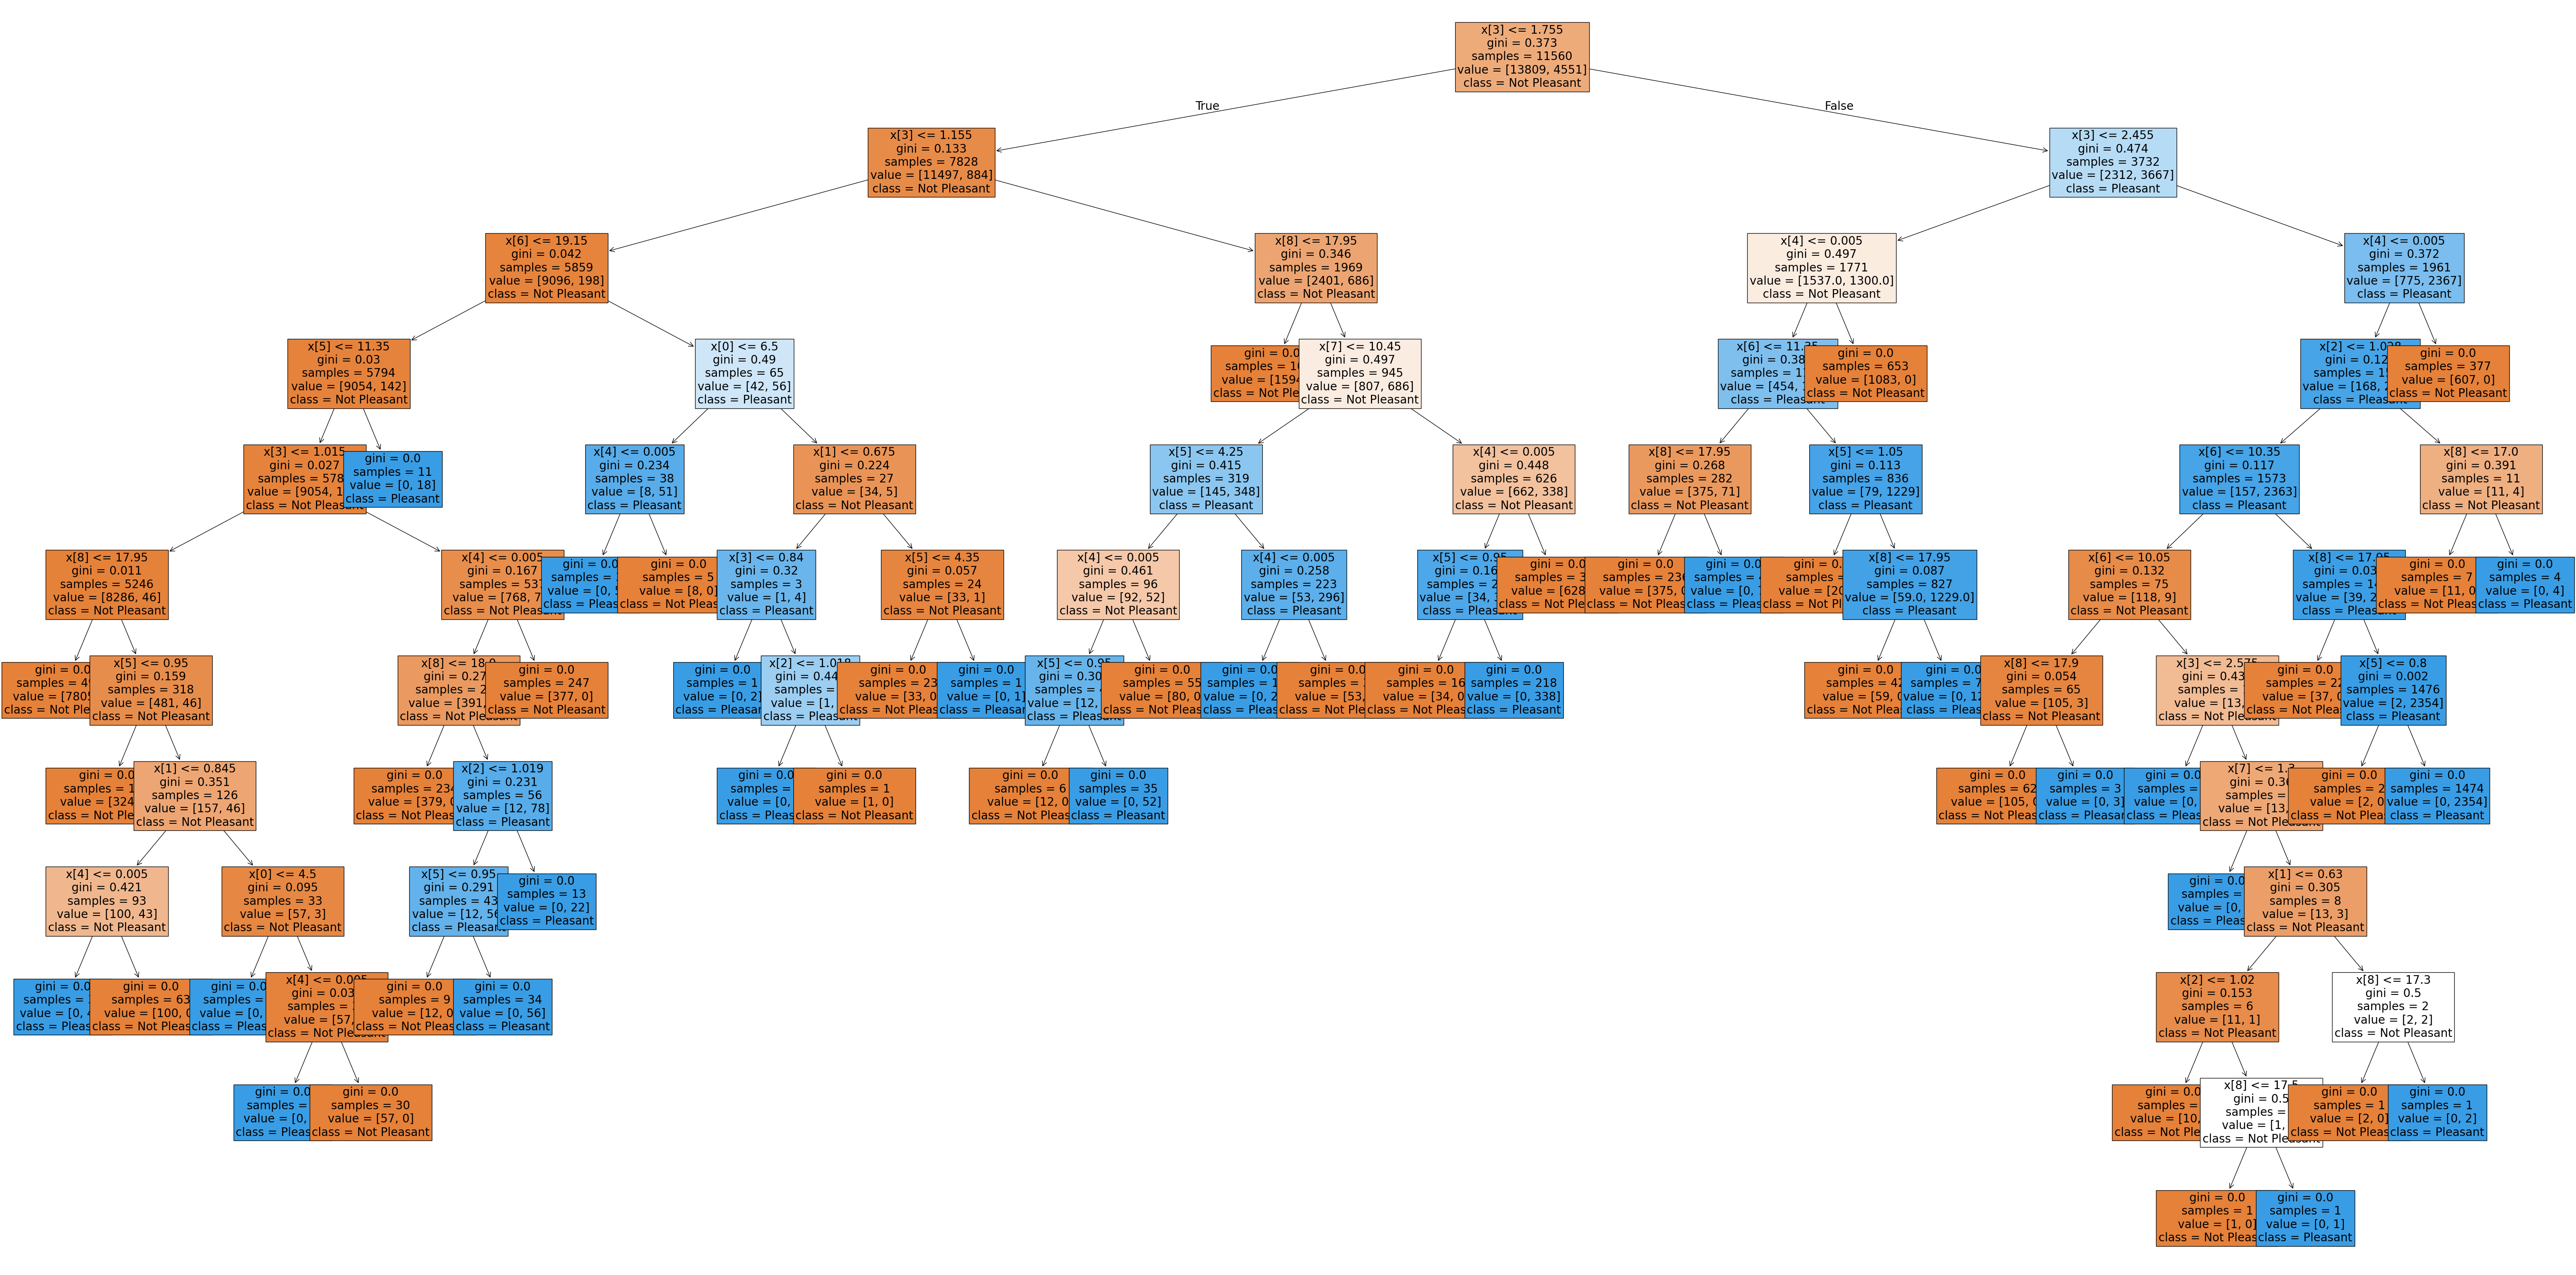

In [91]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=basel_labels, filled=True);#, feature_names = X.columns,class_names=['Not Pleasant', "Pleasant"],filled=True); max_depth = 4, 

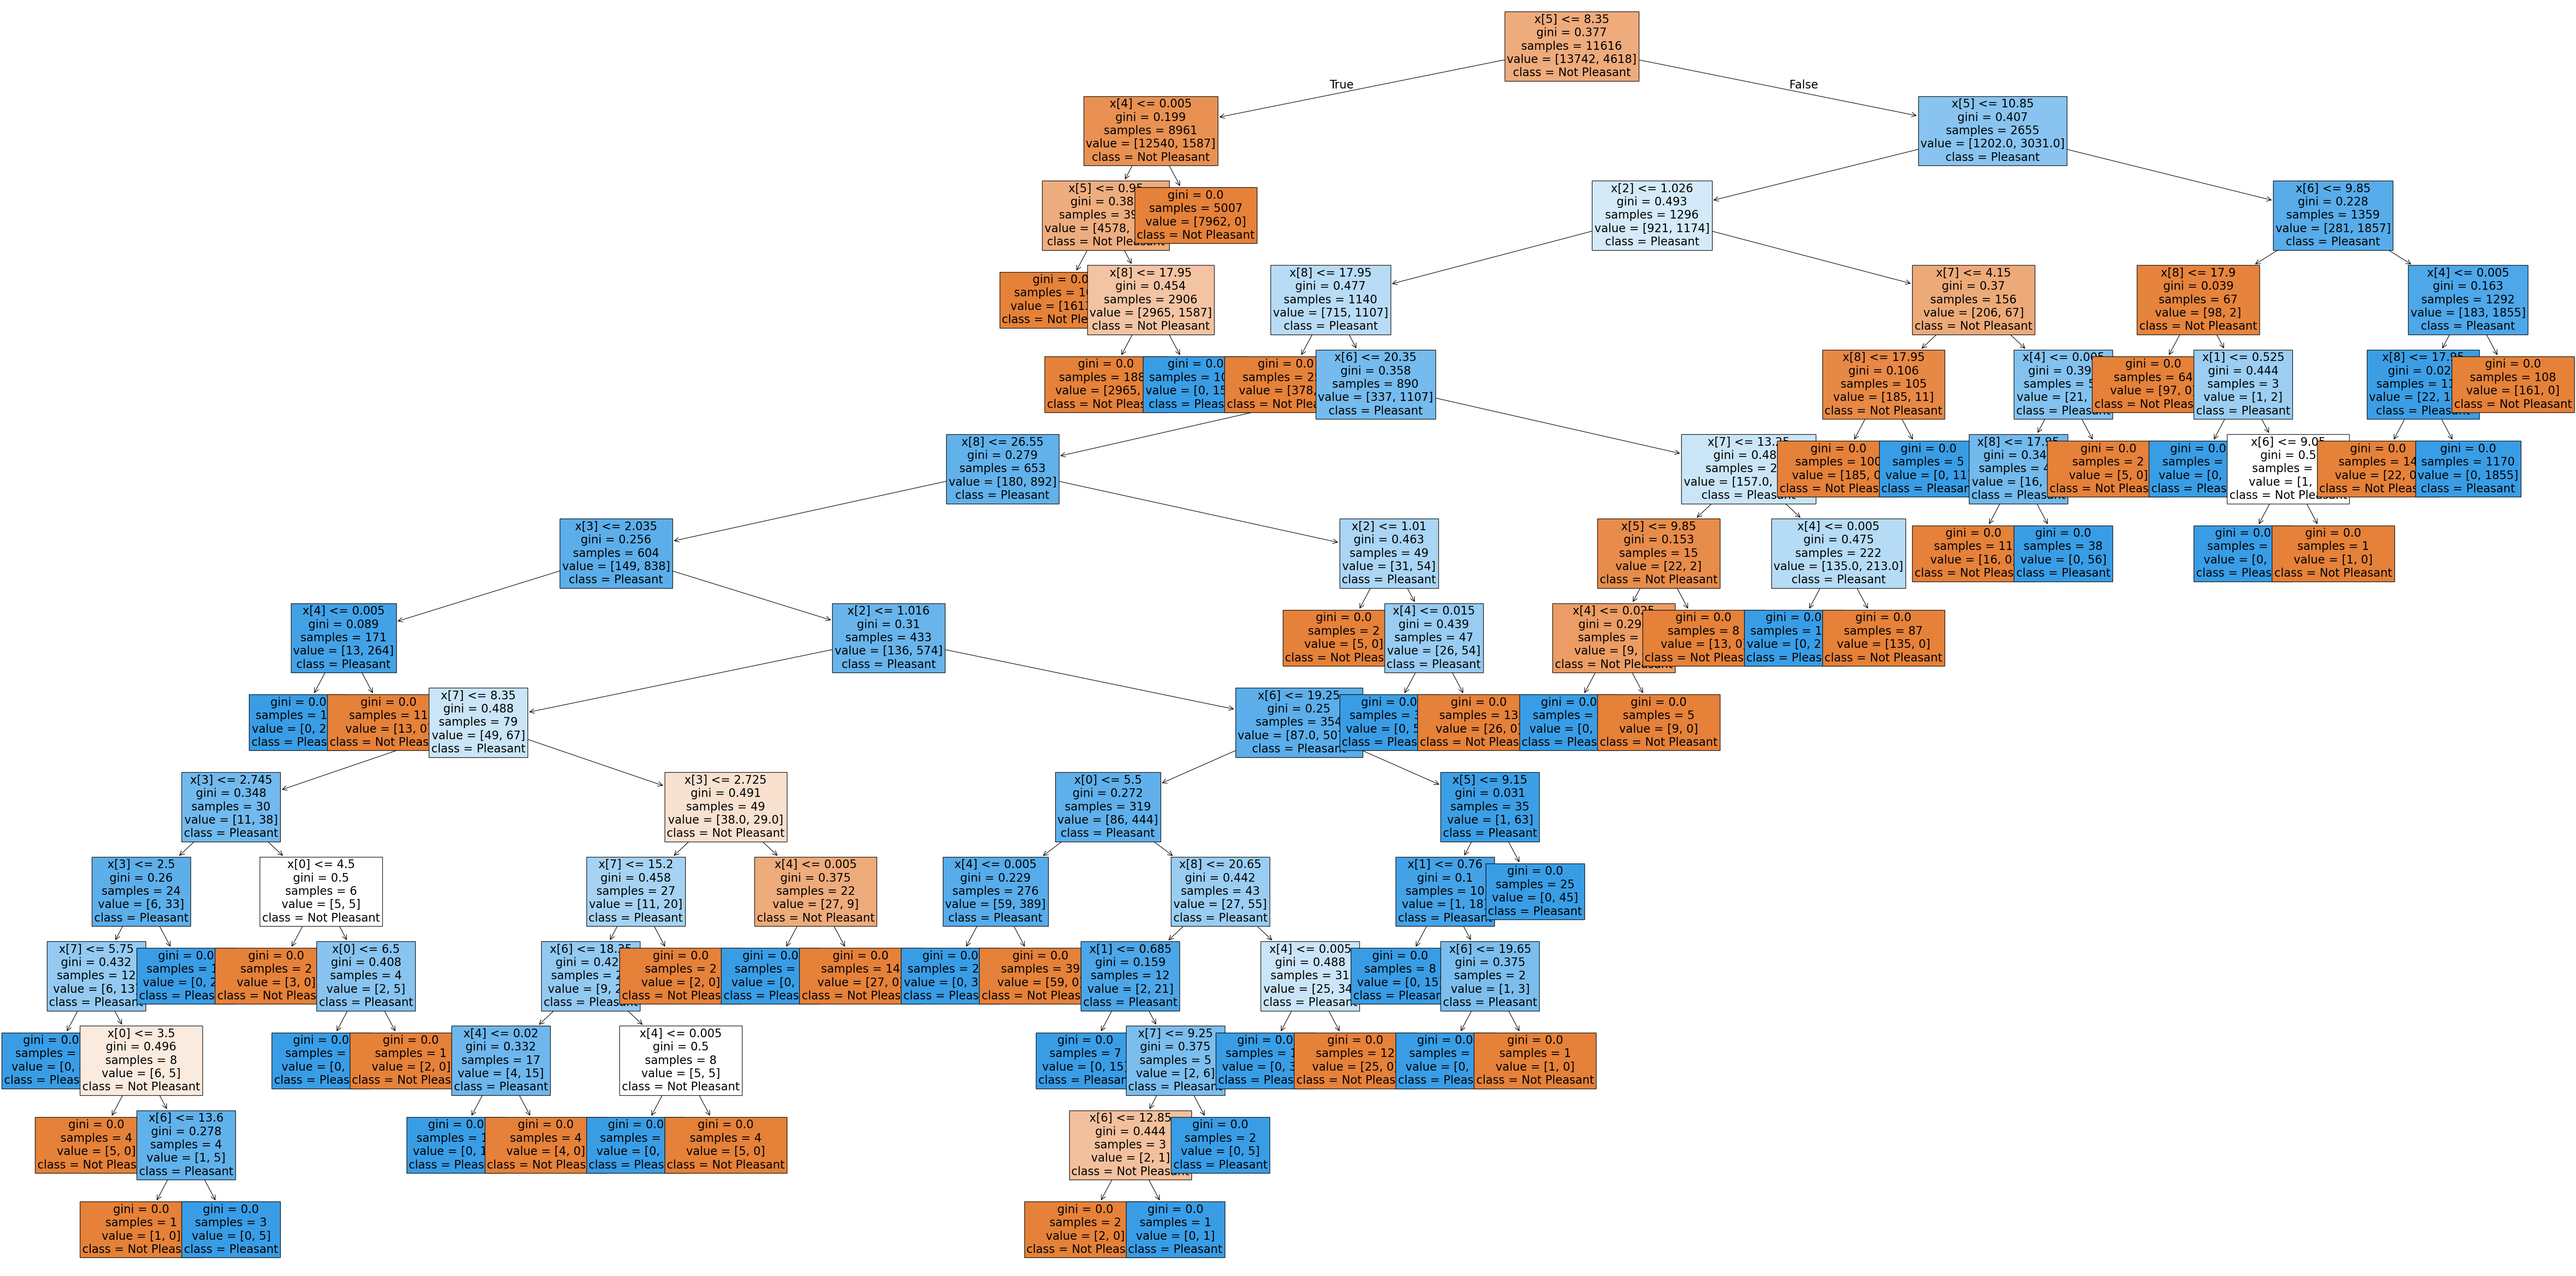

In [93]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=basel_labels, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 7. Conduct feature importances analysis
- Basel

In [96]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01810981, 0.00886988, 0.00810457, 0.11665628, 0.35327727,
       0.10897858, 0.0908051 , 0.0288988 , 0.26629971])

In [98]:
np.set_printoptions(threshold=1000)

In [100]:
newarray = newarray.reshape(-1, 1, 9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.01810981, 0.00886988, 0.00810457, 0.11665628, 0.35327727,
         0.10897858, 0.0908051 , 0.0288988 , 0.26629971]]])

In [102]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.01810981, 0.00886988, 0.00810457, 0.11665628, 0.35327727,
       0.10897858, 0.0908051 , 0.0288988 , 0.26629971])

In [104]:
important = pd.Series(sumarray, index = bas_cols) #.sort_values(ascending = False)
important

BASEL_cloud_cover         0.018110
BASEL_humidity            0.008870
BASEL_pressure            0.008105
BASEL_global_radiation    0.116656
BASEL_precipitation       0.353277
BASEL_sunshine            0.108979
BASEL_temp_mean           0.090805
BASEL_temp_min            0.028899
BASEL_temp_max            0.266300
dtype: float64

['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']


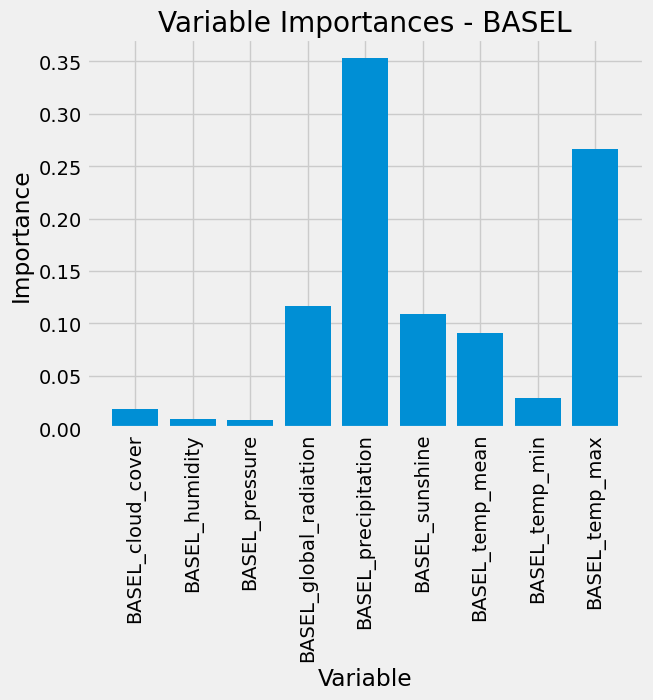

In [106]:
# Conduct variable importances by most influential weather station (feature specific analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(bas_cols)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, bas_cols, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - BASEL');

- **Notes:** Top features of importances are for BASEL weather station are:

        1. Precipitation
        2. Temperature max
        3. Global radiation

------------------------------------------------------------------